In [28]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pydataset

In [5]:
n = 25

df = pd.DataFrame({
    'roast': np.random.choice(['light', 'dark'], n),
    'fixings': np.random.choice(['cream and sugar', 'cream', 'sugar', 'none'], n)
})
df

,roast,fixings
0,light,cream
1,dark,none
2,light,cream and sugar
3,light,sugar
4,light,cream and sugar
5,light,cream and sugar
6,dark,sugar
7,light,none
8,light,sugar
9,light,sugar


How many people prefer black coffee and light roasts? 3
How many people prefer black cofee and dark roasts? 

In [6]:
pd.crosstab(df.fixings, df.roast)

roast,dark,light
fixings,,
cream,1,5
cream and sugar,1,4
none,4,2
sugar,3,5


In [13]:
mpg = pydataset.data('mpg')
mpg.trans = mpg.trans.str[:-4]
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [16]:
pd.crosstab(mpg.trans, mpg.drv, margins=True, normalize=True)

drv,4,f,r,All
trans,,,,
auto,0.320513,0.277778,0.072650,0.67094
manual,0.119658,0.175214,0.034188,0.32906
All,0.440171,0.452991,0.106838,1.00000


> Are drive type and transmission type related?

- $H_0$: drive type and transmission type are independent of each other
- $H_a$: drive type and transmission type are dependent

In [17]:
util.get_expected_props(mpg.trans, mpg.drv)

,4,f,r
auto,0.295328,0.303930,0.071682
manual,0.144843,0.149061,0.035156


In [18]:
pd.crosstab(mpg.trans, mpg.drv)

drv,4,f,r
trans,,,
auto,75,65,17
manual,28,41,8


In [19]:
util.get_expected_values(mpg.trans, mpg.drv)

,4,f,r
auto,69.106838,71.119658,16.773504
manual,33.893162,34.880342,8.226496


1. Setup hypothesis
2. Calculate a test statistic
3. Find a p-value from the test statistic
4. Conclude

$$ \chi^2 = \sum{\frac{(O - E)^2}{E}} $$

In [21]:
observed = pd.crosstab(mpg.trans, mpg.drv)
expected = util.get_expected_values(mpg.trans, mpg.drv)

In [26]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

3.136769245971112

degrees of freedom == (nrows - 1) x (ncols - 1)

In [32]:
degf = (observed.shape[0] - 1) * (observed.shape[1] - 1)
degf

p = stats.chi2(degf).sf(chi2)
p

0.20838152534979645

In [33]:
print(f'''
Because p ({p:.4f}) > alpha (.05), we fail to reject the null hypothesis.
''')


Because p (0.2084) > alpha (.05), we fail to reject the null hypothesis.



In [36]:
titanic = pydataset.data('titanic')
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


## Titanic Example

> Does class matter? I.e. are people with higher class tickets more likely to survive?

- $H_0$: ticket class and whether or not someone survives are independent of each other
- $H_a$: ticket class and whether or not someone survives are dependent

In [57]:
# actual values
pd.crosstab(titanic['class'], titanic.survived)

survived,no,yes
class,,
1st class,122,203
2nd class,167,118
3rd class,528,178


In [58]:
# overall survival rate
(titanic.survived == 'no').mean()

0.6208206686930091

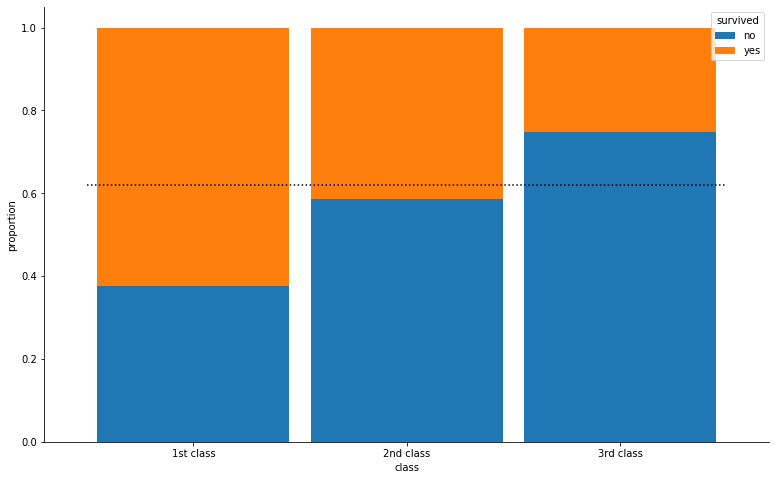

In [41]:
ax = util.plot_group_proportions(titanic, 'class', 'survived', proportions=True)
ax.hlines((titanic.survived == 'no').mean(), -.5, 2.5, ls=':')

In [47]:
# the "easy way"
ctab = pd.crosstab(titanic['class'], titanic.survived)
# chi2_contingency gives us several values back
chi2, p, degf, expected = stats.chi2_contingency(ctab)

print('p=', p)
print(expected)

p= 1.282677517613224e-29
[[201.76671733 123.23328267]
 [176.93389058 108.06610942]
 [438.2993921  267.7006079 ]]


In [59]:
# the actual, observed values
# margins=True shows us the overall values, not just hte intersections of our variables
pd.crosstab(titanic['class'], titanic.survived, margins=True)

survived,no,yes,All
class,,,
1st class,122,203,325
2nd class,167,118,285
3rd class,528,178,706
All,817,499,1316


In [60]:
# actual, observed proportions
# normlize=True gives us percentages instead of values
pd.crosstab(titanic['class'], titanic.survived, margins=True, normalize=True)

survived,no,yes,All
class,,,
1st class,0.092705,0.154255,0.246960
2nd class,0.126900,0.089666,0.216565
3rd class,0.401216,0.135258,0.536474
All,0.620821,0.379179,1.000000


In [56]:
# expected proportions are formed by assuming the features are independent and
# multiplying the probabilities of each class together (see the curriculum for a more in-depth example)
expected_proportions = util.get_expected_props(titanic['class'], titanic.survived)
n = titanic.shape[0]
# multiplying the expected proportions by the sample size gives us the expected values
expected_proportions * n

,no,yes
1st class,201.766717,123.233283
2nd class,176.933891,108.066109
3rd class,438.299392,267.700608


In [61]:
# comparing the actual and expected values
print(ctab)
print()
print(expected)

survived    no  yes
class              
1st class  122  203
2nd class  167  118
3rd class  528  178

[[201.76671733 123.23328267]
 [176.93389058 108.06610942]
 [438.2993921  267.7006079 ]]
